# 🧾 Explanation on Confussion Matrix, Precission, Recall, and F1 Scores using Insurance Claim Classification with Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic insurance data
np.random.seed(42)
n = 200
ages = np.random.randint(18, 65, size=n)
sexes = np.random.choice(['male', 'female'], size=n)
smokers = np.random.choice(['yes', 'no'], size=n, p=[0.3, 0.7])
bmis = np.round(np.random.normal(27, 4, size=n), 1)
sports = np.random.choice(['yes', 'no'], size=n, p=[0.4, 0.6])

df = pd.read_csv("Insurance_Dummy_Dataset.csv")
df.head()

,Age,Sex,Smoker,BMI,Sport,Claim
0,56,0,0,31.6,1,0
1,46,1,0,25.1,1,0
2,32,0,0,24.3,0,0
3,60,1,1,32.4,1,0
4,25,1,0,18.9,0,0


In [11]:
X = df[['Age', 'Sex', 'Smoker', 'BMI', 'Sport']]
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

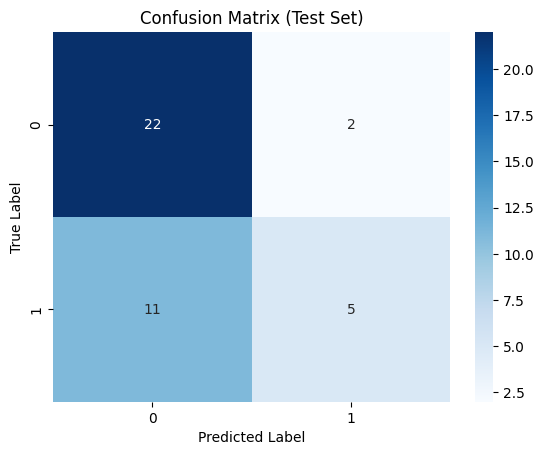

In [12]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [13]:
report = classification_report(y_test, y_pred_test, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.666667,0.916667,0.771930,24.000
1,0.714286,0.312500,0.434783,16.000
accuracy,0.675000,0.675000,0.675000,0.675
macro avg,0.690476,0.614583,0.603356,40.000
weighted avg,0.685714,0.675000,0.637071,40.000


AUC Score: 0.672
Optimal Threshold: 0.430


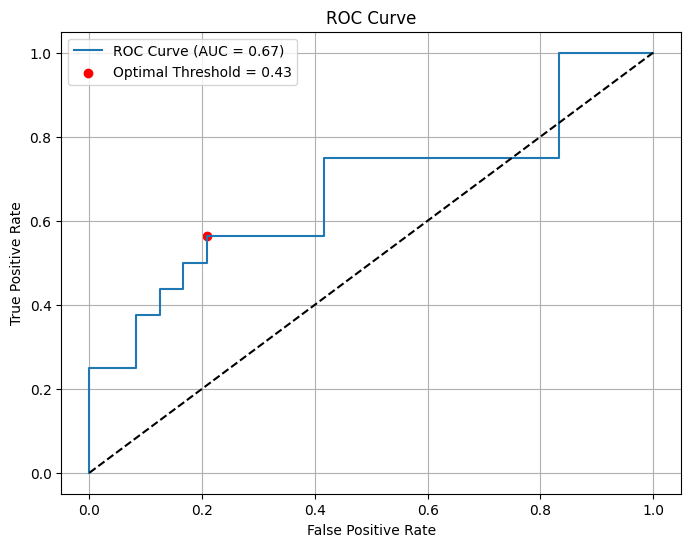

Precision: 0.643
Recall: 0.562
F1-Score: 0.600


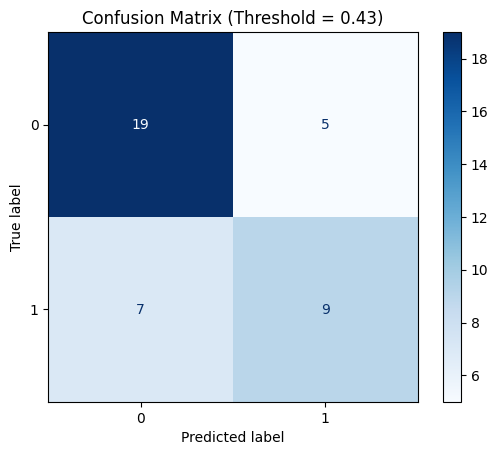

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Fit model & prediksi probabilitas
model.fit(X_train, y_train)
y_proba_test = model.predict_proba(X_test)[:, 1]

# 2. ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
auc_score = roc_auc_score(y_test, y_proba_test)

# 3. Threshold optimal (Youden’s J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
print(f"AUC Score: {auc_score:.3f}")
print(f"Optimal Threshold: {optimal_threshold:.3f}")

# 4. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 5. Buat prediksi berdasarkan threshold optimal
y_pred_optimal = (y_proba_test >= optimal_threshold).astype(int)

# 6. Evaluasi: Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# 7. Confusion Matrix (threshold optimal)
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Threshold = {optimal_threshold:.2f})")
plt.show()


In [15]:
report = classification_report(y_test, y_pred_optimal, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.730769,0.791667,0.760,24.0
1,0.642857,0.562500,0.600,16.0
accuracy,0.700000,0.700000,0.700,0.7
macro avg,0.686813,0.677083,0.680,40.0
weighted avg,0.695604,0.700000,0.696,40.0


## 🧠 How We Improved Accuracy Using ROC Curve and Optimal Threshold

In our original classification using Logistic Regression, we relied on the **default probability threshold of 0.5** to classify whether a user would make an insurance claim or not. However, this default is not always optimal, especially when the class distribution is imbalanced or when false positives and false negatives carry different costs.

### 🚀 ROC Curve to the Rescue

To improve the model, we implemented **Receiver Operating Characteristic (ROC) analysis)**:

- **ROC Curve** plots the trade-off between:
  - **True Positive Rate (Recall)**
  - **False Positive Rate**

...for various classification thresholds.

- **AUC (Area Under Curve)** quantifies the model's ability to distinguish between classes. In our case, the AUC was **0.67**, indicating moderate performance.

- Instead of using the default threshold of 0.5, we searched for the **optimal threshold** by maximizing **Youden’s J statistic** (*TPR - FPR*), which balances sensitivity and specificity.

### 🎯 Optimal Threshold

From the ROC analysis, the **optimal threshold was 0.43**.

This means: if the predicted probability of a claim is greater than **43%**, we classify it as a claim.

### ✅ Results

| Threshold       | Accuracy |
|-----------------|----------|
| 0.50 (default)  | 67.5%    |
| 0.43 (optimal)  | 70.0%    |

By simply adjusting the decision threshold using ROC analysis, we were able to **boost the model's accuracy by 2.5%**, while also potentially improving other metrics like **recall** and **F1-score** — critical in domains like insurance risk.

---

### 🛠 Code Reference

This implementation is available in the notebook section titled:

**ROC